분류 실습 - 캐글 산탄데르 고객 만족 예측 <br>
p267~p278

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [6]:
warnings.filterwarnings('ignore')
cust_df=pd.read_csv('./train_santander.csv',encoding='latin-1')
print('dataset shape: ',cust_df.shape)
cust_df.head()

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt=cust_df['TARGET'].count()

print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [9]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
cust_df['var3'].value_counts() #-999999값 116개 처리 필요 -> 평균값 2로 변환

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [11]:
#1. 999999 -> 2 변환
#2. ID 피처 드롭
#3. 클래스 데이터 / 피처 데이터 분리

cust_df['var3'].replace(-999999,2,inplace=True) #1
cust_df.drop('ID',axis=1,inplace=True) #2

X_features=cust_df.iloc[:,:-1] #클래스열을 제외한 나머지
y_labels=cust_df.iloc[:,-1] #클래스열(마지막칼럼)만

print('피처 데이터 shape {0}'.format(X_features.shape))



피처 데이터 shape (76020, 369)


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_features,y_labels,test_size=0.2,random_state=0)

#shape
print('학습데이터 shape: {0}, 테스트데이터 shape: {1}'.format(X_train.shape,X_test.shape))

train_cnt=y_train.count()
test_cnt=y_test.count()

#학습데이터,테스트 레이블 값 분포
print("\n\n학습데이터 레이블 분포:\n",y_train.value_counts()/train_cnt)
print()
print("테스트데이터 레이블 분포:\n",y_test.value_counts()/test_cnt)



학습데이터 shape: (60816, 369), 테스트데이터 shape: (15204, 369)


학습데이터 레이블 분포:
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트데이터 레이블 분포:
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [13]:
#XGBoost의 조기중단 검증데이터 세트로 사용하기 위해서 X_train,y_train을 다시 쪼갬
#학습/검증 데이터 세트로 분리
X_tr, X_val , y_tr, y_val = train_test_split(X_train, y_train , test_size=0.3, random_state=0) 

조기 중단을 위해 검증 데이터를 사용하는 방식은 다음과 같습니다.

모델을 학습하면서 주기적으로 검증 데이터에 대한 성능을 측정합니다.
성능이 일정 기간 동안 개선되지 않으면(즉, 과적합이 발생할 가능성이 높아지면) 학습을 중단합니다.
이전에 저장된 최적의 모델을 반환하거나 사용합니다.
검증 데이터를 사용하여 조기 중단을 구현하면 모델이 학습 데이터에만 과적합되는 것을 방지할 수 있습니다. 이는 모델이 학습 데이터에만 지나치게 적합되어 새로운 데이터에 대한 일반화 성능이 저하되는 것을 막아줍니다.

In [14]:
pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
#XGBoost 모델 학습과 하이퍼 파라미터 튜닝

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#클래스 생성
xgb_clf=XGBClassifier(n_estimators=500,learning_rate=0.05,random_state=156)

#fit
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

#predic한거 auc점수
xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

In [77]:
#XGBoost 하이퍼파라미터 튜닝 by HyperOpt

!pip install hyperopt



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
#XGBoost 하이퍼 파라미터 튜닝
#hp.uniform: 정의된 범위 내에서 임의의 숫자를 무작위 추출
# hp.quniform: 정의된 범위 내에서 마지막 숫자만큼의 간격을 두어 숫자를 추출 
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform( 'max_depth' , 5, 15, 1), 
'min_child_weight' : hp.quniform( 'min_child_weight' , 1, 6, 1), 
'colsample_bytree' : hp.uniform( 'colsample_bytree' , 0.5, 0.95), 
'learning_rate' : hp.uniform( 'learning_rate' ,0.01 , 0.2) }

In [58]:
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf=XGBClassifier(n_estimators=30,max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'])
    
    roc_auc_list=[]
    
    #3개의 k-fold 방식 적용
    kf=KFold(n_splits=3)
    #X_train -> 학습 / 검증용 데이터 분리
    for tr_index, val_index in kf.split(X_train):
        X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]
        
        #추출된 학습 / 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=10,eval_metric='auc',
                    eval_set=[(X_tr,y_tr),(X_val,y_val)])
        
        score=roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
        #3개의 k-fold로 계산된 roc-auc값의 평균값 반한하되, -1 곱하기 
        #HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾기 때문
        return -1*np.mean(roc_auc_list)

In [59]:
from hyperopt import fmin,tpe,Trials

trials=Trials()

best=fmin(fn=objective_func,
          space=xgb_search_space,
          algo=tpe.suggest,
          max_evals=50,
          trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)



[0]	validation_0-auc:0.76925	validation_1-auc:0.73368 
[1]	validation_0-auc:0.77931	validation_1-auc:0.74099 
[2]	validation_0-auc:0.78206	validation_1-auc:0.74516 
[3]	validation_0-auc:0.82632	validation_1-auc:0.79329 
[4]	validation_0-auc:0.82410	validation_1-auc:0.79134 
[5]	validation_0-auc:0.83679	validation_1-auc:0.80348 
[6]	validation_0-auc:0.84272	validation_1-auc:0.80982 
[7]	validation_0-auc:0.84774	validation_1-auc:0.81687 
[8]	validation_0-auc:0.84653	validation_1-auc:0.81238 
[9]	validation_0-auc:0.85115	validation_1-auc:0.81855 
[10]	validation_0-auc:0.85084	validation_1-auc:0.81767
[11]	validation_0-auc:0.85443	validation_1-auc:0.82027
[12]	validation_0-auc:0.85277	validation_1-auc:0.81820
[13]	validation_0-auc:0.85278	validation_1-auc:0.81682
[14]	validation_0-auc:0.85604	validation_1-auc:0.82069
[15]	validation_0-auc:0.85590	validation_1-auc:0.81956
[16]	validation_0-auc:0.85906	validation_1-auc:0.82247
[17]	validation_0-auc:0.85852	validation_1-auc:0.82120
[18]	valid

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

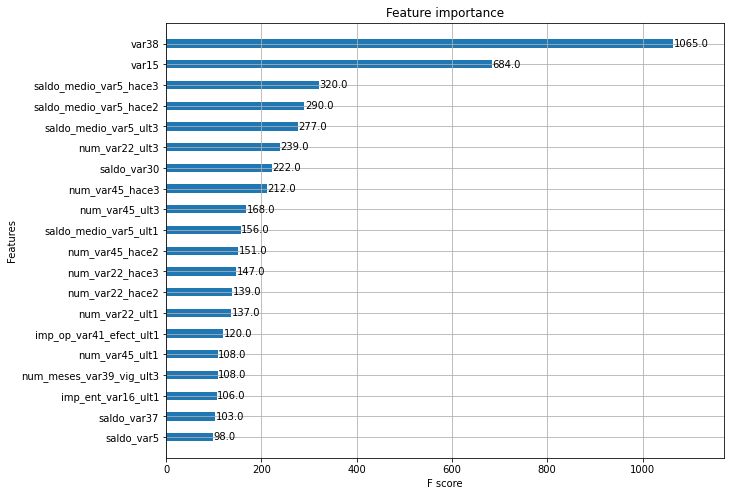

In [60]:
#튜닝된 XGBoost 모델에서 피처 중요도
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20,height=0.4)

In [23]:
pip install lightgbm


   ---------------------------------------- 1.3/1.3 MB 14.3 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
#LightGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=500)

eval_set=[(X_tr,y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set )
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8134


In [63]:
lgbm_search_space={'num_leaves':hp.quniform('num_leaves',32,64,1),
                   'max_depth':hp.quniform('max_depth',100,160,1),
                   'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                   'subsample':hp.uniform('subsample',0.7,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [72]:
def objective_func(search_space): 
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']), 
                              max_depth=int(search_space['max_depth']), 
                              min_child_samples=int(search_space['min_child_samples']), 
                              subsample=search_space['subsample'], 
                              learning_rate=search_space['learning_rate'])
    
    roc_auc_list=[]
    
    #3개-K-fold 방식 적용
    kf=KFold(n_splits=3)
    
    #X_train -> X_tr / X_val 분류
    for tr_index,val_index in kf.split(X_train):#kf.split(X_train)으로 tr/val index 나옴
        X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]
        
        lgbm_clf.fit(X_tr,y_tr,eval_metric='auc',
                     eval_set=[(X_tr,y_tr),(X_val,y_val)])
        
        score=roc_auc_score(y_val,lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    return (-1)*np.mean(roc_auc_list)


In [35]:
pip install --upgrade hyperopt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
pip install --upgrade numpy

     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from hyperopt import fmin, tpe, Trials 

trials = Trials()

best = fmin(fn=objective_func, space=lgbm_search_space , algo=tpe.suggest, 
            max_evals=50, trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)
            
    

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                    
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872 
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13008                    
[LightGBM] [Info] Number of data points in the train set: 40544, numb

In [75]:
lgbm_clf=LGBMClassifier(n_estimators=500,num_leaves=int(best['num_leaves']),
                        max_depth=int(best['max_depth']),
                        min_child_samples=int(best['min_child_samples']),
                        subsample=round(best['subsample'],5),
                        learning_rate=round(best['learning_rate'],5)
                        )

lgbm_clf.fit(X_tr,y_tr,
             eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

lgbm_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8417
